# HISTOGRAMS

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%pylab inline
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import imageio
imageio.plugins.ffmpeg.download()


data_root = 'D:/Dropbox/MPhys Lungs Shared Folder/datadump/fullguys'

patient_names = []

for folder, subs, files in os.walk(data_root):
    for name in subs:
        patient_names.append(os.path.abspath(os.path.join(folder, name)))
        
print(patient_names)

Populating the interactive namespace from numpy and matplotlib
['D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC1', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC10', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC11', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC16', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC2', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC5', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC6', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC7', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\SABR1', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\SABR10', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\SABR2', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\SABR3', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\SABR4', 'D:\\Dropbox\\MPhys Lungs S

In [3]:
patient_data = []
pvar=0 
while pvar<len(patient_names):
    templine = []
    for folder, subs, files in os.walk(patient_names[pvar]):
        for name in files:
            templine.append(os.path.abspath(os.path.join(folder, name)))
    patient_data.append(templine)
    pvar+=1
    
print(patient_data[6])

['D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC6\\NSCLC6_registered_OARsfullscan2.nii.csv', 'D:\\Dropbox\\MPhys Lungs Shared Folder\\datadump\\fullguys\\NSCLC6\\NSCLC6_registered_OARsfullscan3.nii.csv']


In [13]:
#patient_contains names of all scans

pvar = 0 #scan number
while pvar<len(patient_data):
    bigmatrix = []
    i=0
    while i < len(patient_data[pvar]):
        with open(patient_data[pvar][i],"r") as file:
            datamatrix = []
            for l in file:
                templine = []
                l.replace("\n","")
                bit = l.split(",")

                datamatrix.append([int(bit[0]),int(bit[1]),
                                 int(bit[2]),int(bit[3].replace('\n',''))])

        bigmatrix.append(datamatrix) # each element of bigmatrix contains an entire scan
        i+=1

    bigmatrix = np.array(bigmatrix)
    #print(len(bigmatrix))
    xvalmatrix = []
    yvalmatrix = []
    zvalmatrix = []
    pixvalmatrix= []
    i=0
    j=0
    while i<len(patient_data[pvar]):
        xvals, yvals, zvals, pixvals = [],[],[],[]
        while j < len(bigmatrix[0]):
            xvals.append(bigmatrix[i][j][0])
            yvals.append(bigmatrix[i][j][1])
            zvals.append(bigmatrix[i][j][2])
            pixvals.append(bigmatrix[i][j][3])
            j+=1
        xvalmatrix.append(xvals)
        yvalmatrix.append(yvals)
        zvalmatrix.append(zvals)
        pixvalmatrix.append(pixvals)
        i+=1

    scanlist = []
    xlist = []
    ylist = []
    zlist =[]
    pixlist = []

    i=0
    while i<len(bigmatrix):

        for element in bigmatrix[i]:
            scanlist.append(i) # contains index of scan number
            xlist.append(element[0])
            ylist.append(element[1])
            zlist.append(element[2])
            pixlist.append(element[3])

        i+=1

        adict = {
            'Scan':scanlist,
            'x' : xlist,
            'y' : ylist,
            'z' : zlist,
            'pix' : pixlist
        }

    df = pd.DataFrame(adict)
    print(df.loc[df["Scan"].idxmax()].Scan)
    """
    sns.set(color_codes=True)
    ax = sns.distplot(df["pix"])
    sns.despine()
    pname = patient_names[pvar].replace(data_root.replace('/','\\'), '')
    ax.set_title('Boxplot for ' + pname.replace('\\',''),fontsize=20,color="r",alpha=0.5)
    ax.set(xlabel='Pixel value', ylabel='Pixel count')
    filename = data_root + '\\' + pname + 'boxes.png'
    savefig(filename)
    plt.show()
    plt.close()
    """
    
    pvar+=1

5
0
3
4
5
5
1
6
4
2
2
4
4
3
5
5
0
7


c:\users\rhydian\appdata\local\programs\python\python35\lib\site-packages\seaborn\distributions.py:191: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\users\rhydian\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

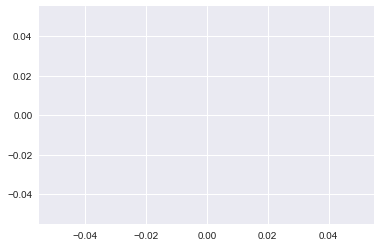

In [6]:
sns.set(color_codes=True)
ax = sns.distplot(pixvals, kde=False, rug=True)
sns.despine()
patientname = file_paths[0].replace(data_root.replace('/','\\'),'').replace('_registered_OARsmask.nii.csv','')
print(patientname)
ax.set_title('Histogram of Pixel Values: Patient ' + patientname.replace('\\',''),fontsize=20,color="r",alpha=0.5)
ax.set(xlabel='Pixel Values', ylabel='Frequency')
plt.show()
histfilename = data_root + patientname + 'histogram.png'
savefig(histfilename)